In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("dummied_full.csv")

In [11]:
train,test,target_train,target_test=train_test_split(df.drop("Target",axis=1),df.Target,test_size=0.33,random_state=42)

In [12]:

xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42)
xgb_model.fit(train,target_train)

G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
pred=xgb_model.predict(test)
print(confusion_matrix(target_test,pred))

[[12353  4879]
 [ 6998  8554]]


In [14]:
print(accuracy_score(target_test,pred))

0.6377196193265008


In [10]:
print(f"The most important features contributions is : {np.max(xgb_model.feature_importances_)} feature number {np.argmax(xgb_model.feature_importances_)+1} name: number_inpatient")
#print(np.argmax(xgb_model.feature_importances_))

The most important features contributions is : 0.0665719211101532 feature number 7 name: number_inpatient


# Try scaling numerical features

# EDIT : Useless because xgboost already scales features

In [55]:
data=df[["time_in_hospital","num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient","number_diagnoses"]]

In [56]:
scaler = StandardScaler()

In [62]:
scaler.fit(data)

StandardScaler()

In [65]:
df[["time_in_hospital","num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient","number_diagnoses"]]=pd.DataFrame(scaler.transform(data))

In [66]:
df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,...,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,Target
0,-1.138438,-0.097243,-0.783565,-1.850439,-0.291863,-0.211622,-0.500575,-3.298145,1,0,...,0,0,0,0,0,0,0,0,0,NO
1,-0.464673,0.820659,-0.783565,0.249657,-0.291863,-0.211622,-0.500575,0.823436,1,0,...,0,0,0,0,0,0,0,0,0,YES
2,-0.801555,-1.627080,2.152815,-0.368019,1.288995,-0.211622,0.292810,-0.722157,1,0,...,0,0,0,0,0,0,0,0,0,NO
3,-0.801555,0.055741,-0.196289,0.002587,-0.291863,-0.211622,-0.500575,-0.206960,0,1,...,0,0,0,0,0,0,0,0,0,NO
4,-1.138438,0.412703,-0.783565,-0.985694,-0.291863,-0.211622,-0.500575,-1.237355,0,1,...,0,0,0,0,0,0,0,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99338,-0.464673,0.412703,-0.783565,0.002587,-0.291863,-0.211622,-0.500575,0.823436,0,1,...,0,0,0,0,0,0,0,0,0,YES
99339,0.209092,-0.505200,0.978263,0.249657,-0.291863,-0.211622,0.292810,0.823436,1,0,...,0,0,0,0,0,0,0,0,0,NO
99340,-1.138438,0.514692,-0.783565,-0.862159,0.498566,-0.211622,-0.500575,2.884226,0,1,...,0,0,0,0,0,0,0,0,0,NO
99341,1.893505,0.106735,0.390987,0.620262,-0.291863,-0.211622,0.292810,0.823436,1,0,...,0,0,0,0,0,0,0,0,0,NO


In [ ]:
train,test,target_train,target_test=train_test_split(df.drop("Target",axis=1),df.Target,test_size=0.33,random_state=42)

In [67]:
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42)
xgb_model.fit(train,target_train)
pred=xgb_model.predict(test)
print(confusion_matrix(target_test,pred))
print(accuracy_score(target_test,pred))

G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[12353  4879]
 [ 6998  8554]]
0.6377196193265008


# Trying RandomizedSearchCV next

In [6]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [7]:
clf=RandomizedSearchCV(xgb_model,param_distributions=parameters,random_state=42,n_jobs=-1,cv=10)

search=clf.fit(train,target_train)
search.best_params_

NameError: name 'xgb_model' is not defined

In [20]:
search.best_params_

{'n_estimators': 140, 'max_depth': 9, 'learning_rate': 0.05}

# best Learning rate is 0.05, since it's the last value of the list we might ant to try other values 

In [21]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05, 0.02, 0.03, 0.04]
}

In [22]:
clf=RandomizedSearchCV(xgb_model,param_distributions=parameters,random_state=42,n_jobs=-1,cv=10)

search=clf.fit(train,target_train)
search.best_params_

G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:52:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'n_estimators': 140, 'max_depth': 6, 'learning_rate': 0.1}

# Best params overall : n_estimators: 140 | max_depth: 6 | learning_rate: 0.1

In [15]:
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42,n_estimators=140,max_depth=6,learning_rate=0.1,verbosity=0)
xgb_model.fit(train,target_train)
pred=xgb_model.predict(test)
print(confusion_matrix(target_test,pred))
print(accuracy_score(target_test,pred))

G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[12634  4598]
 [ 7273  8279]]
0.637902635431918


# Sadly the accuracy barely gets better

In [16]:
import seaborn as sns


<AxesSubplot:xlabel='col_0', ylabel='Target'>

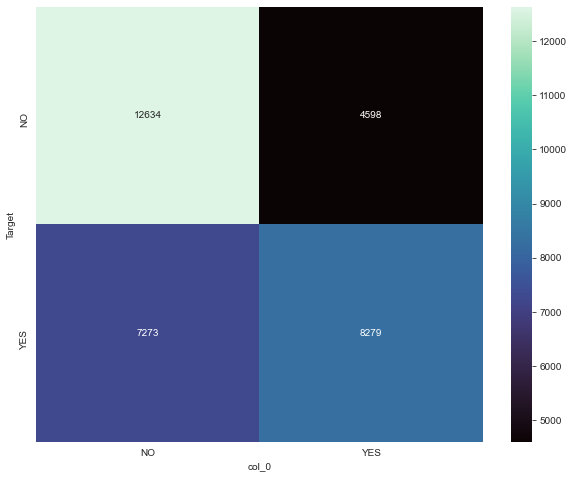

In [21]:
sns.set_style("whitegrid")

cf_matrix=pd.crosstab(target_test,pred)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cf_matrix,annot=True,ax=ax,fmt='g',cmap="mako")

# "Since we are primarily interested in factors that lead to early readmission, we defined the readmission attribute (outcome) as having two values: “readmitted,” if the patient was readmitted within 30 days of discharge or “otherwise” "

In [74]:
df=pd.read_csv("Preprocessed06_12.csv")

In [75]:
#df.loc[df["Target"]=="<30","Target"]="readmitted"
#df.loc[df["Target"]==">30","Target"]="Otherwise"
#df.loc[df["Target"]=="NO","Target"]="Otherwise"

df.Target.unique()

array(['Otherwise', 'readmitted'], dtype=object)

In [81]:
train,test,target_train,target_test=train_test_split(df.drop("Target",axis=1),df.Target,test_size=0.33,random_state=42)

In [77]:
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42)
xgb_model.fit(train,target_train)
pred=xgb_model.predict(test)


G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



In [78]:
print(confusion_matrix(target_test,pred))
print(accuracy_score(target_test,pred))

[[20931    46]
 [ 2081    34]]
0.9078901784167677


In [8]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05, 0.02, 0.03, 0.04]
}

clf=RandomizedSearchCV(xgb_model,param_distributions=parameters,random_state=42,n_jobs=-1,cv=10)

search=clf.fit(train,target_train)
search.best_params_

G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'n_estimators': 140, 'max_depth': 6, 'learning_rate': 0.1}

In [79]:
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42,n_estimators=140,max_depth=6,learning_rate=0.1,verbosity=0)
xgb_model.fit(train,target_train)
pred=xgb_model.predict(test)
print(confusion_matrix(target_test,pred))
print(accuracy_score(target_test,pred))

G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[[20967    10]
 [ 2099    16]]
0.908669669149489


# Best classifier so far 

<AxesSubplot:xlabel='col_0', ylabel='Target'>

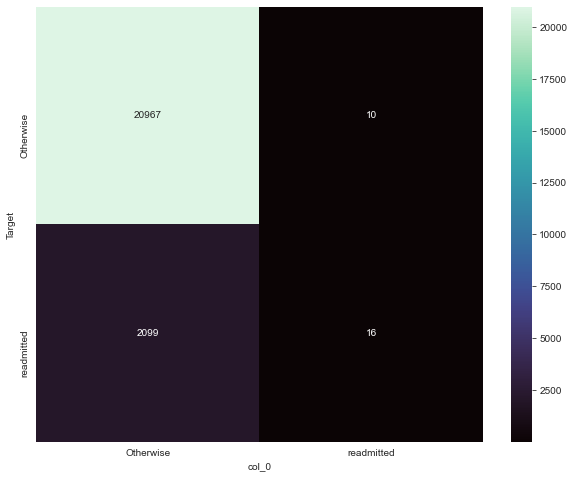

In [87]:
import seaborn as sns
sns.set_style("whitegrid")

cf_matrix=pd.crosstab(target_test,pred)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cf_matrix,annot=True,ax=ax,fmt='g',cmap="mako")

# SVM test  !Warning! very long training time

In [10]:
import sklearn

In [24]:
clf2=svm.SVC(kernel="poly")
clf2.fit(train,target_train)

SVC(kernel='poly')

In [25]:
preds=clf2.predict(test)

In [26]:
print(accuracy_score(target_test,preds))

0.8846388482186432


needs to be optimized

# Weight attribute was considered to be too sparse and it was not included in further analysis

In [52]:
#df2=df.drop(["payer_code_?","payer_code_BC","payer_code_CH","payer_code_CM","payer_code_CP","payer_code_DM","payer_code_FR","payer_code_HM","payer_code_MC","payer_code_MD","payer_code_MP","payer_code_OG","payer_code_OT","payer_code_PO","payer_code_SI","payer_code_SP","payer_code_UN","payer_code_WC"],axis=1)


In [53]:
#df2.drop(["weight_Over200","weight_?","weight_(0-25)","weight_(100-125)","weight_(125-150)","weight_(150-175)","weight_(175-200)","weight_(25-50)","weight_(50-75)","weight_(75-100)"],inplace=True,axis=1)

In [35]:
#train,test,target_train,target_test=train_test_split(df2.drop("Target",axis=1),df2.Target,test_size=0.33,random_state=42)

#xgb_model.fit(train,target_train)
#preds=xgb_model.predict(test)
#print(accuracy_score(target_test,preds))

0.8849438750610054


In [83]:
contrib=pd.DataFrame(xgb_model.feature_importances_)

contrib["names"]=df.drop("Target",axis=1).columns

#contrib.set_index('names').T

In [84]:
contrib.sort_values(by=[0],ascending=False)

,0,names
235,0.046390,discharge_disposition_id_1
250,0.022437,discharge_disposition_id_22
6,0.015613,number_inpatient
106,0.014797,diag_1_Mental Disorders
236,0.012982,discharge_disposition_id_2
...,...,...
161,0.000000,repaglinide_Down
32,0.000000,medical_specialty_Endocrinology-Metabolism
38,0.000000,medical_specialty_Hospitalist
39,0.000000,medical_specialty_InfectiousDiseases


In [85]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=contrib[0],
            y=contrib.names,
            orientation='h'))

fig.show()